# Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Graph 1 generation



Number of nodes: 8


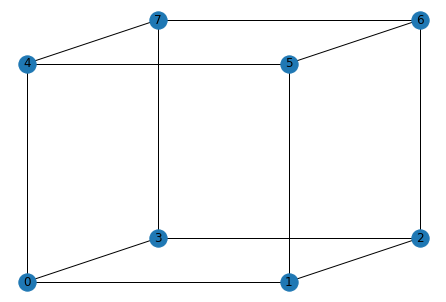

In [2]:
pos = {0:[1,1], 1:[3,1], 2:[4,2], 3:[2,2], 4:[1,6],
       5:[3,6], 6:[4,7], 7:[2,7]}

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0),  # Lower square
                  (4, 5), (5, 6), (6, 7), (7, 4),  # Upper square
                  (0, 4), (1, 5), (2, 6), (3, 7),])  # Connection between squares

n_nodes = len(G)
print("Number of nodes:", n_nodes)

nx.draw(G, pos, with_labels=True)

# Maximizing Avg Opinion position for Graph 1

In [3]:
n_iter = 50  # Number of iterations

final_opinions = dict()
average_opinion = dict() 

for node in G.nodes:
    # 0-stubborn node is fixed
    if node == 0:
        continue
        
    # Stubborn and regular nodes
    stubborn = [0, node]
    regular = [node for node in G.nodes if node not in stubborn]

    u = [0,1]  # Input to stubborn nodes
    ic = np.random.uniform(0,1,len(regular))  # random initial condition for regular nodes

    # P matrix
    W = nx.adjacency_matrix(G).toarray()  # scipy.sparse.csr_matrix to numpy array
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W

    # Submatrices
    Q = P[np.ix_(regular, regular)]
    E = P[np.ix_(regular, stubborn)]

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn,0] = u;
    x[regular,0] = ic;

    for t in range(1,n_iter):
        x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
        x[stubborn, t] = x[stubborn, t-1];

    final_opinions[node] = x[:,n_iter-1]
    average_opinion[node] = np.average(final_opinions[node])
    print("Average opinion:", round(average_opinion[node], 3), "Stubborn nodes: ", stubborn)

Average opinion: 0.5 Stubborn nodes:  [0, 1]
Average opinion: 0.5 Stubborn nodes:  [0, 2]
Average opinion: 0.5 Stubborn nodes:  [0, 3]
Average opinion: 0.5 Stubborn nodes:  [0, 4]
Average opinion: 0.5 Stubborn nodes:  [0, 5]
Average opinion: 0.5 Stubborn nodes:  [0, 6]
Average opinion: 0.5 Stubborn nodes:  [0, 7]


# Graph 2 generation

Number of nodes: 14


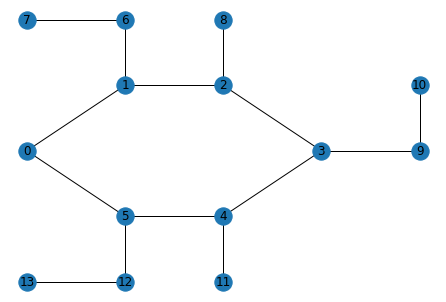

In [4]:
pos = {0:[1,3], 1:[2,4], 2:[3,4], 3:[4,3], 4:[3,2], 5:[2,2], 6:[2,5], 7:[1,5],
       8:[3,5], 9:[5,3], 10:[5,4], 11:[3,1], 12:[2,1], 13:[1,1]}

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),  # Central Exagon
                  (1, 6), (6, 7), (2, 8), (3, 9), (9, 10), (4, 11), (5, 12), (12, 13)])

n_nodes = len(G)
print("Number of nodes:", n_nodes)

nx.draw(G, pos, with_labels=True)

# Maximizing Avg Opinion position for Graph 2

In [ ]:
n_iter = 500  # Number of iterations

final_opinions = dict()
average_opinion = dict() 

for node in G.nodes:
    # 0-stubborn node is fixed
    if node == 0:
        continue
        
    # Stubborn and regular nodes
    stubborn = [0, node]
    regular = [node for node in G.nodes if node not in stubborn]

    u = [0,1]  # Input to stubborn nodes
    ic = np.random.uniform(0,1,len(regular))  # random initial condition for regular nodes

    # P matrix
    W = nx.adjacency_matrix(G).toarray()  # scipy.sparse.csr_matrix to numpy array
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W

    # Submatrices
    Q = P[np.ix_(regular, regular)]
    E = P[np.ix_(regular, stubborn)]

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn,0] = u;
    x[regular,0] = ic;

    for t in range(1,n_iter):
        x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
        x[stubborn, t] = x[stubborn, t-1];

    final_opinions[node] = x[:,n_iter-1]
    average_opinion[node] = np.average(final_opinions[node])
    print("Average opinion:", round(average_opinion[node], 3), "Stubborn nodes: ", stubborn)

Average opinion: 0.557 Stubborn nodes:  [0, 1]
Average opinion: 0.536 Stubborn nodes:  [0, 2]
Average opinion: 0.548 Stubborn nodes:  [0, 3]
Average opinion: 0.536 Stubborn nodes:  [0, 4]
Average opinion: 0.557 Stubborn nodes:  [0, 5]
Average opinion: 0.331 Stubborn nodes:  [0, 6]
Average opinion: 0.239 Stubborn nodes:  [0, 7]
Average opinion: 0.337 Stubborn nodes:  [0, 8]
Average opinion: 0.386 Stubborn nodes:  [0, 9]
Average opinion: 0.296 Stubborn nodes:  [0, 10]
Average opinion: 0.337 Stubborn nodes:  [0, 11]
Average opinion: 0.331 Stubborn nodes:  [0, 12]
Average opinion: 0.239 Stubborn nodes:  [0, 13]
